In [2]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
(alpha,beta1,beta2)=(1,1,-2)

x0 = np.ones(100)
x0 = np.reshape(x0,(100,1))
x1 =np.random.normal(loc=2,scale=1,size=(100,1))
x2 =np.random.poisson(4,(100,1))
eps = np.random.normal(loc=0,scale=1,size=(100,1))
y=alpha+beta1*x1+beta2*x2+eps


In [3]:
X=np.concatenate((x0,x1,x2),axis=1)
XT=np.transpose(X)

XTX = (np.dot(XT,X))
XTXinv = np.linalg.inv(XTX)
XTy = (np.dot(XT,y))
beta_hat = np.dot(XTXinv,XTy)

print (beta_hat)


[[ 0.69626864]
 [ 0.97081865]
 [-1.89883001]]


In [4]:
print('alpha_hat is', beta_hat[0])
print('beta1_hat is', beta_hat[1])
print('beta2_hat is', beta_hat[2])

alpha_hat is [0.69626864]
beta1_hat is [0.97081865]
beta2_hat is [-1.89883001]


In [5]:
Cov = XTXinv
print (Cov)

[[ 8.87009132e-02 -2.05309262e-02 -1.04719477e-02]
 [-2.05309262e-02  1.09570727e-02 -9.13365011e-05]
 [-1.04719477e-02 -9.13365011e-05  2.81639376e-03]]


In [6]:
#3
x0 = np.ones(100)
x0 = np.reshape(x0,(100,1))
x1 =np.random.normal(loc=2,scale=36,size=(100,1))
x2 =np.random.poisson(4,(100,1))
eps = np.random.normal(loc=0,scale=1,size=(100,1))
y=alpha+beta1*x1+beta2*x2+eps

X=np.concatenate((x0,x1,x2),axis=1)
XT=np.transpose(X)

XTX = (np.dot(XT,X))
XTXinv = np.linalg.inv(XTX)
XTy = (np.dot(XT,y))
beta_hat = np.dot(XTXinv,XTy)

print (beta_hat)

Cov2 = XTXinv
print (Cov2)
print ('variance of theta_hat become closer to zero.')


[[ 0.6783803 ]
 [ 1.00207646]
 [-1.91875751]]
[[ 5.10024888e-02 -5.14771935e-05 -9.96885192e-03]
 [-5.14771935e-05  7.83908730e-06  3.15911609e-07]
 [-9.96885192e-03  3.15911609e-07  2.44285033e-03]]
variance of theta_hat become closer to zero.


In [7]:
i = 1
beta = [ ]
beya =np.array()
(alpha,beta1,beta2)=(1,1,-2)
for i in range(1,1000):
    x0 = np.ones(100)
    x0 = np.reshape(x0,(100,1))
    x1 =np.random.normal(loc=2,scale=1,size=(100,1))
    x2 =np.random.poisson(4,(100,1))
    eps = np.random.normal(loc=0,scale=1,size=(100,1))
    y=alpha+beta1*x1+beta2*x2+eps
    X=np.concatenate((x0,x1,x2),axis=1)
    XT=np.transpose(X)
    XTX = (np.dot(XT,X))
    XTXinv = np.linalg.inv(XTX)
    XTy = (np.dot(XT,y))
    beta_hat = np.dot(XTXinv,XTy)
    beta.append(beta_hat)
    i=i+1

In [8]:
betaA = np.asarray(beta)
print(betaA)
betaB = np.transpose(betaA)
a = betaB[0]


#why is shape of betaA and betaB is 3-D

[[[ 1.51619727]
  [ 0.98075953]
  [-2.08582281]]

 [[ 1.22095198]
  [ 0.86659732]
  [-2.00324763]]

 [[ 1.05764218]
  [ 0.98977638]
  [-2.00755767]]

 ...

 [[ 0.65964156]
  [ 1.07387403]
  [-1.97293441]]

 [[ 0.87000983]
  [ 1.05018493]
  [-2.01582532]]

 [[ 1.08244391]
  [ 1.04362786]
  [-2.03632632]]]


In [44]:
n = 1000
Q = XTX/n
Qinv = np.linalg.inv(Q)
Var = Qinv/n

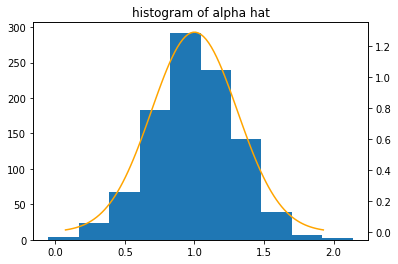

In [46]:
mu_a = 1
var_a = Var.item((0,0))
sigma_a = math.sqrt(var_a)
l = np.linspace(mu_alpha - 3*sigma_a, mu_a + 3*sigma_a, 100)

fig , ax1 = plt.subplots()
ax1.hist(a[0])
ax2 = ax1.twinx()
ax2.plot(l, stats.norm.pdf(l, mu_alpha, sigma_alpha),color='orange')
plt.title('histogram of alpha hat')
plt.show()

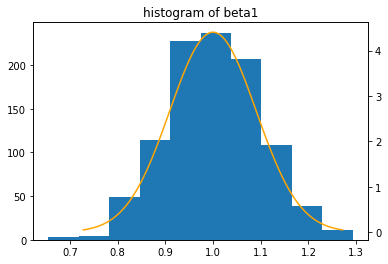

In [52]:
mu_b1 = 1
var_b1 = Var.item((1,1))
sigma_b1 = math.sqrt(var_b1)
l = np.linspace(mu_b1 - 3*sigma_b1, mu_b1 + 3*sigma_b1, 100)

fig ,ax1 = plt.subplots()
ax1.hist(a[1])
ax2 = ax1.twinx()
ax2.plot(l, stats.norm.pdf(l,mu_b1,sigma_b1),color = 'orange')

plt.title('histogram of beta1')
plt.show()

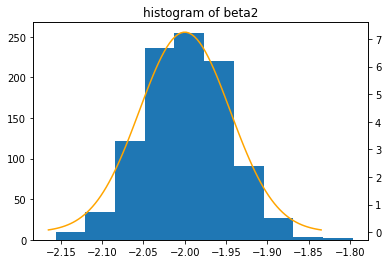

In [58]:
mu_b2 = -2
var_b2 = Var.item((2,2))
sigma_b2 = math.sqrt(var_b2)
l = np.linspace(mu_b2 - 3*sigma_b2, mu_b2 + 3*sigma_b2, 100)

fig, ax1 = plt.subplots()
ax1.hist(a[2])
ax2 = ax1.twinx()
ax2.plot (l, stats.norm.pdf(l,mu_b2,sigma_b2),color = 'orange')
plt.title('histogram of beta2')
plt.show()